In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
covid_base_df = pd.read_csv("covid_base.txt", sep="\t", header=None)
covid_ds_df = pd.read_csv("covid_ds.txt", sep="\t", header=None)

In [67]:
covid_base_df.head()

,0,1
0,0.7500,801.455314
1,0.7600,795.490382
2,0.7925,800.686952
3,0.7400,801.952887
4,0.7475,802.256305


In [68]:
base_acc_arr = np.array(covid_base_df.iloc[:, 0])
base_time_arr = np.cumsum(np.array(covid_base_df.iloc[:, 1]))/3600

ds_acc_arr = np.array(covid_ds_df.iloc[:, 0])
ds_time_arr = (np.cumsum(np.array(covid_ds_df.iloc[:, 1]))+40)/3600

In [69]:
flower_acc_df = pd.read_csv("covid_flower_acc.txt").iloc[:, 1]

flower_acc_arr = []
for i in range(len(flower_acc_df)):
    cur_val = float(flower_acc_df[i][10:])
    flower_acc_arr.append(cur_val)

In [70]:
flower_time_df = pd.read_csv("covid_flower_time.txt").iloc[:, 0]

flower_time_arr = []
for i in range(len(flower_time_df)):
    cur_val = float(flower_time_df[i][5:])
    flower_time_arr.append(cur_val)

for i in range(1, len(flower_time_arr)):
    flower_time_arr[i] = flower_time_arr[i] - flower_time_arr[0]

flower_time_arr = np.array(flower_time_arr)/3600

In [71]:
openfl_df = pd.read_csv("covid_openfl.txt", header=None)
openfl_time_arr = np.array(openfl_df.iloc[:,0])/3600
openfl_acc_arr = np.array(openfl_df.iloc[:,1])

In [72]:
# For baseline and data station, let's plot two points

max_base_ind = np.argmax(base_acc_arr)
max_ds_ind = np.argmax(ds_acc_arr)

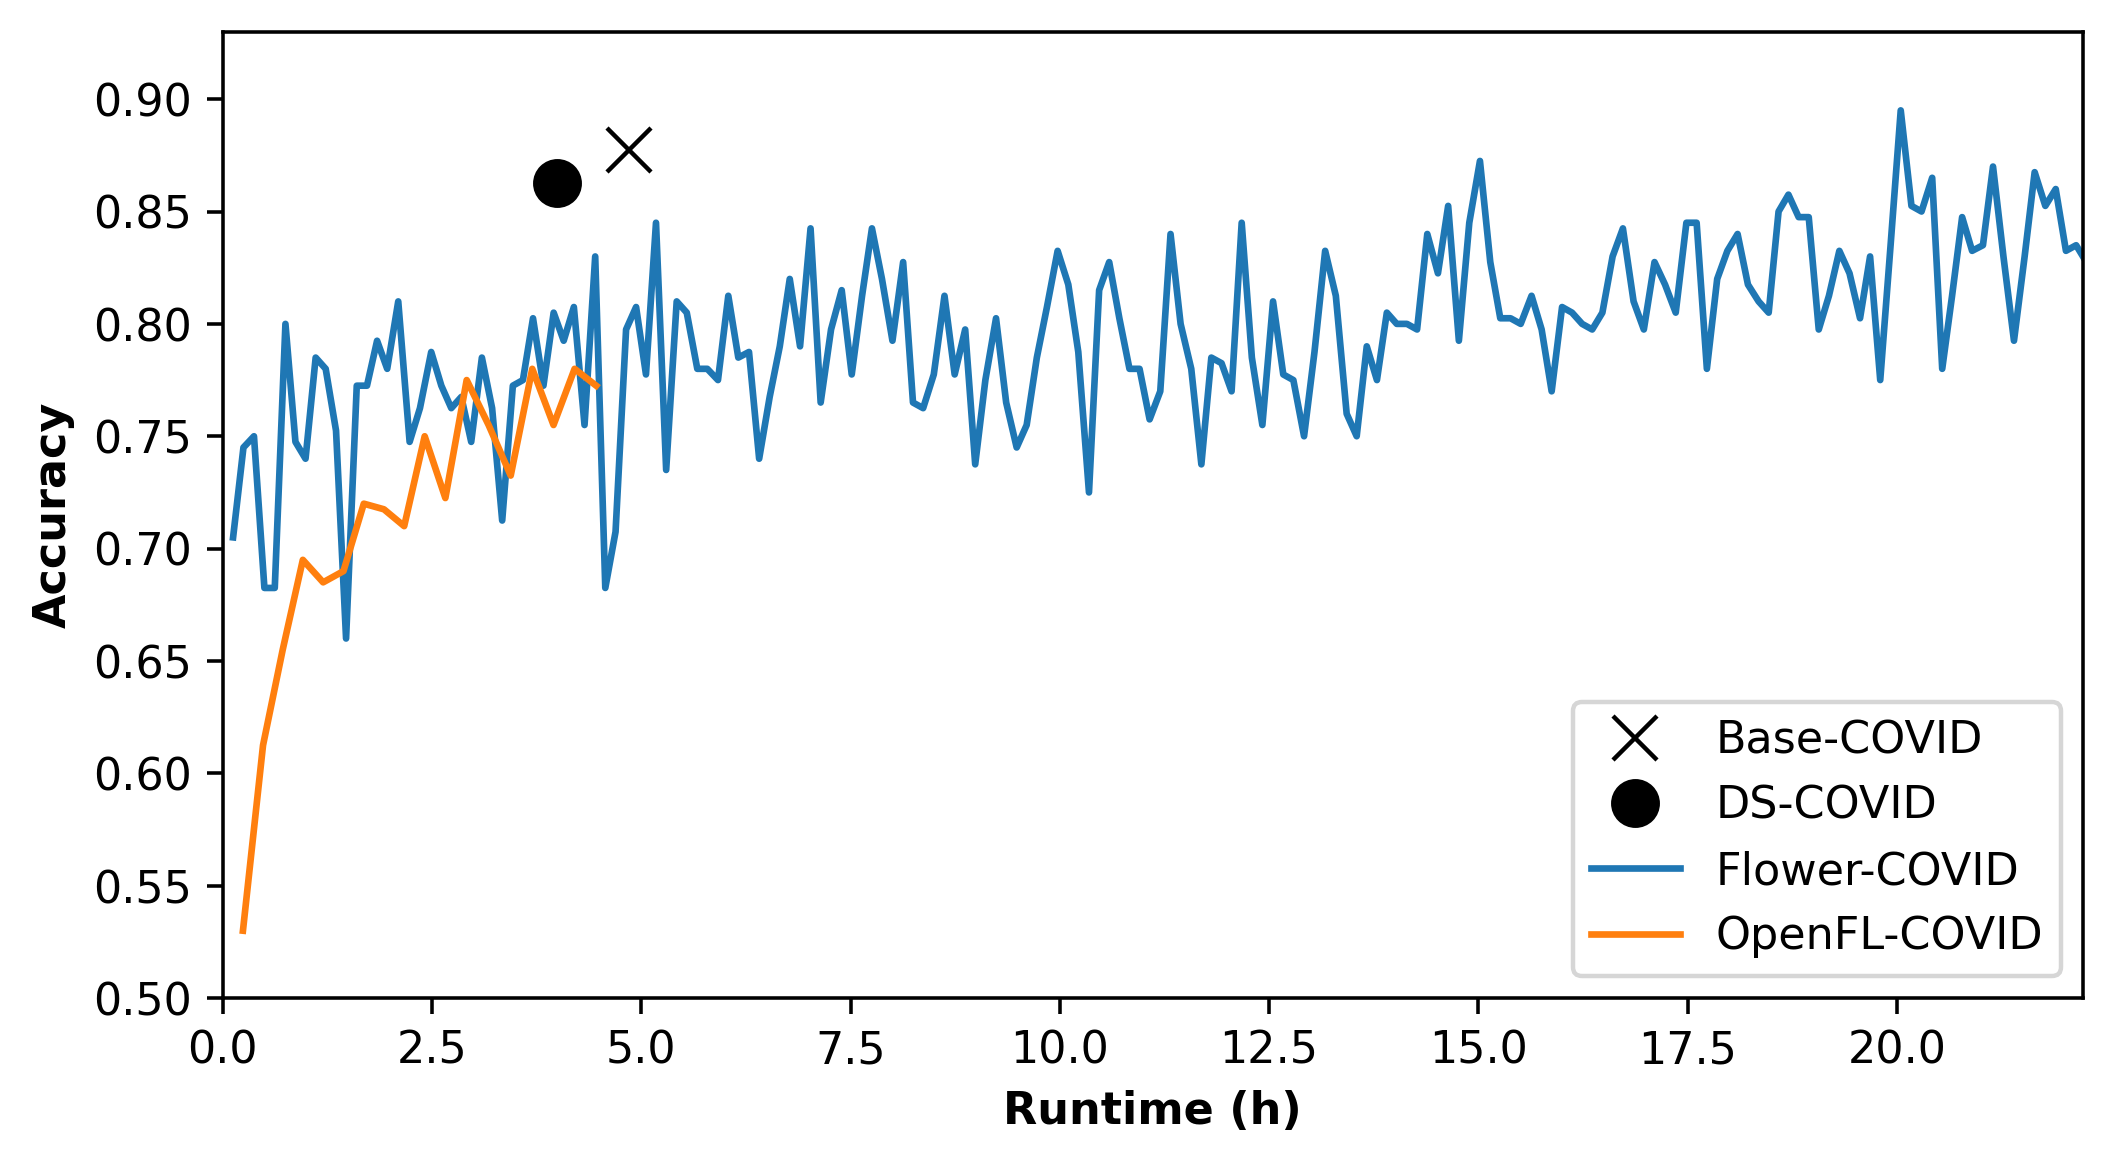

In [86]:
plt.figure(figsize=(7.5, 4), dpi=320)

plt.plot(base_time_arr[max_base_ind],
         base_acc_arr[max_base_ind],
         marker='x',
         markersize=10,
         color="k",
         linewidth=0,
         label="Base-COVID")
plt.plot(ds_time_arr[max_ds_ind],
         ds_acc_arr[max_ds_ind],
         marker='o',
         markersize=10,
         color="k",
         linewidth=0,
         label="DS-COVID")
plt.plot(flower_time_arr[1:], flower_acc_arr[1:], label="Flower-COVID")
plt.plot(openfl_time_arr, openfl_acc_arr, label="OpenFL-COVID")
plt.xlim([0, 80000/3600])
plt.ylim([0.5, 0.93])
plt.xlabel("Runtime (h)", fontweight="bold")
plt.ylabel("Accuracy", fontweight="bold")
plt.legend(loc=4)
plt.savefig("covid_8.pdf",
            facecolor="w",
            bbox_inches='tight',)